## 0 Seabornの準備

In [4]:
import piplite
import pyodide
await piplite.install("seaborn")

import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_theme(style="darkgrid")

/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## 1-1 groupby()

In [5]:
data = pd.read_csv(pyodide.open_url("https://raw.githubusercontent.com/ChungWookyung/kg-jupyterlite-data-analysis/main/content/DATA/testdata.csv"))
data.head()

,A,B,C,D,E,F
0,1,Male,187,85,Reading,3.5
1,2,Female,156,45,Movie,3.7
2,3,Female,159,49,Game,2.9
3,4,Male,179,69,Movie,2.1
4,5,Male,169,63,Game,1.5


任意の属性をもつ擬似データを読み込んだ

In [7]:
data.groupby("B").mean()

,A,C,D,F
B,,,,
Female,5.000000,158.750000,51.250000,3.200000
Male,5.833333,173.833333,74.166667,2.566667


B列でグループを作ってグループ別平均を求めた

In [8]:
data.groupby("E").mean()

,A,C,D,F
E,,,,
Game,6.250000,163.500000,59.75,2.750000
Movie,5.333333,168.666667,68.00,2.700000
Reading,4.666667,172.666667,69.00,3.033333


E列でグループを作ってグループ別平均を求めた

In [9]:
data.groupby(["B","E"]).mean()

A      C     D     F
B      E                              
Female Game     6.0  156.0  52.0  3.05
       Movie    2.0  156.0  45.0  3.70
       Reading  6.0  167.0  56.0  3.00
Male   Game     6.5  171.0  67.5  2.45
       Movie    7.0  175.0  79.5  2.20
       Reading  4.0  175.5  75.5  3.05

BとE列を同時に使ったグループを作ってグループ別平均を求めた

## 1-2 各種統計量の計算

In [10]:
data.groupby(["B","E"]).var()

A      C      D      F
B      E                                 
Female Game     18.0   18.0   18.0  0.045
       Movie     NaN    NaN    NaN    NaN
       Reading   NaN    NaN    NaN    NaN
Male   Game      4.5    8.0   40.5  1.805
       Movie    18.0   32.0  220.5  0.020
       Reading  18.0  264.5  180.5  0.405

groupby().var()は分散を求める

In [11]:
data.groupby(["B","E"]).count()

A  C  D  F
B      E                  
Female Game     2  2  2  2
       Movie    1  1  1  1
       Reading  1  1  1  1
Male   Game     2  2  2  2
       Movie    2  2  2  2
       Reading  2  2  2  2

groupby().count()は個数をカウントする

In [12]:
data.groupby(["B","E"]).sum()

A    C    D    F
B      E                         
Female Game     12  312  104  6.1
       Movie     2  156   45  3.7
       Reading   6  167   56  3.0
Male   Game     13  342  135  4.9
       Movie    14  350  159  4.4
       Reading   8  351  151  6.1

groupby().sum()は合計を求める

## 2-1 データをくっつけるとは？ concat()

In [14]:
data = pd.read_csv(pyodide.open_url("https://raw.githubusercontent.com/ChungWookyung/kg-jupyterlite-data-analysis/main/content/DATA/testdata.csv"))
data1 = data.iloc[:5,:]
data2 = data.iloc[5:,:]

In [15]:
data1

,A,B,C,D,E,F
0,1,Male,187,85,Reading,3.5
1,2,Female,156,45,Movie,3.7
2,3,Female,159,49,Game,2.9
3,4,Male,179,69,Movie,2.1
4,5,Male,169,63,Game,1.5


In [16]:
data2

,A,B,C,D,E,F
5,6,Female,167,56,Reading,3.0
6,7,Male,164,66,Reading,2.6
7,8,Male,173,72,Game,3.4
8,9,Female,153,55,Game,3.2
9,10,Male,171,90,Movie,2.3


ここに同じ列を持っているdata1とdata2がある

In [17]:
pd.concat([data1,data2])

,A,B,C,D,E,F
0,1,Male,187,85,Reading,3.5
1,2,Female,156,45,Movie,3.7
2,3,Female,159,49,Game,2.9
3,4,Male,179,69,Movie,2.1
4,5,Male,169,63,Game,1.5
5,6,Female,167,56,Reading,3.0
6,7,Male,164,66,Reading,2.6
7,8,Male,173,72,Game,3.4
8,9,Female,153,55,Game,3.2
9,10,Male,171,90,Movie,2.3


pd.concat()は同じ列を持ったデータ同士を列方向にくっつける

## 2-2 データをくっつけるとは？ merge()

In [18]:
data = pd.read_csv(pyodide.open_url("https://raw.githubusercontent.com/ChungWookyung/kg-jupyterlite-data-analysis/main/content/DATA/testdata.csv"))
data1 = data.iloc[:,[0,1,3]]
data2 = data.iloc[:,[0,2,4,5]]

In [19]:
data1.head()

,A,B,D
0,1,Male,85
1,2,Female,45
2,3,Female,49
3,4,Male,69
4,5,Male,63


In [20]:
data2.head()

,A,C,E,F
0,1,187,Reading,3.5
1,2,156,Movie,3.7
2,3,159,Game,2.9
3,4,179,Movie,2.1
4,5,169,Game,1.5


data1とdata2を読み込んだ

In [21]:
pd.merge(data1,data2,on="A")

,A,B,D,C,E,F
0,1,Male,85,187,Reading,3.5
1,2,Female,45,156,Movie,3.7
2,3,Female,49,159,Game,2.9
3,4,Male,69,179,Movie,2.1
4,5,Male,63,169,Game,1.5
5,6,Female,56,167,Reading,3.0
6,7,Male,66,164,Reading,2.6
7,8,Male,72,173,Game,3.4
8,9,Female,55,153,Game,3.2
9,10,Male,90,171,Movie,2.3


pd.merge()はインデックスを指定して、列方向にデータをくっつける

## 3-1 pivot_table()の説明

In [22]:
data = pd.read_csv(pyodide.open_url("https://raw.githubusercontent.com/ChungWookyung/kg-jupyterlite-data-analysis/main/content/DATA/testdata.csv"))
data.head()

,A,B,C,D,E,F
0,1,Male,187,85,Reading,3.5
1,2,Female,156,45,Movie,3.7
2,3,Female,159,49,Game,2.9
3,4,Male,179,69,Movie,2.1
4,5,Male,169,63,Game,1.5


まずはデータを読み込む

In [23]:
data.pivot_table(index="B",columns="E",values="C")

E,Game,Movie,Reading
B,,,
Female,156.0,156.0,167.0
Male,171.0,175.0,175.5


In [24]:
data.pivot_table(index="E",columns="B",values="D")

B,Female,Male
E,,
Game,52.0,67.5
Movie,45.0,79.5
Reading,56.0,75.5


In [25]:
data.pivot_table(index="B",columns="E",values="F")

E,Game,Movie,Reading
B,,,
Female,3.05,3.7,3.00
Male,2.45,2.2,3.05


## 3-2 melt()の説明

In [26]:
data.melt(id_vars="A",value_vars=["B","E"])

,A,variable,value
0,1,B,Male
1,2,B,Female
2,3,B,Female
3,4,B,Male
4,5,B,Male
5,6,B,Female
6,7,B,Male
7,8,B,Male
8,9,B,Female
9,10,B,Male


In [27]:
data.melt(id_vars="A",value_vars=["C","D","F"])

,A,variable,value
0,1,C,187.0
1,2,C,156.0
2,3,C,159.0
3,4,C,179.0
4,5,C,169.0
5,6,C,167.0
6,7,C,164.0
7,8,C,173.0
8,9,C,153.0
9,10,C,171.0


<AxesSubplot:xlabel='A', ylabel='value'>

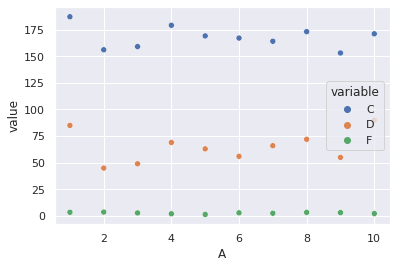

In [28]:
temp = data.melt(id_vars="A",value_vars=["C","D","F"])
sns.scatterplot(data = temp, x ="A", y = "value", hue = "variable")

## 4 学校データの加工と処理

In [30]:
data = pd.read_csv(pyodide.open_url("https://raw.githubusercontent.com/ChungWookyung/kg-jupyterlite-data-analysis/main/content/DATA/mhigh.csv"))
data1 = data.iloc[:,[0,1,2,3,4,5,6]]
data2 = data.iloc[:,[0,1,2,9,7,8]]

In [31]:
data1.head()

,氏名,氏名.カタカナ.,性別,学年,国語,数学,成績合計
0,住田佳織,スミダカオリ,女,3,91,99,190
1,野中辰男,ノナカタツオ,男,3,88,94,182
2,田村比呂志,タムラヒロシ,男,3,99,80,179
3,南部愛梨,ナンブアイリ,女,3,77,99,176
4,熊沢悠生,クマザワユウセイ,男,1,88,87,175


In [32]:
data2.head()

,氏名,氏名.カタカナ.,性別,クラス,身長,体重
0,住田佳織,スミダカオリ,女,A,154.9,51.2
1,野中辰男,ノナカタツオ,男,A,172.8,65.3
2,田村比呂志,タムラヒロシ,男,A,171.3,62.4
3,南部愛梨,ナンブアイリ,女,A,157.8,54.3
4,熊沢悠生,クマザワユウセイ,男,A,168.6,58.8


### 実習問題：data1とdata2を氏名をインデックスとしてくっつけてdataという名前をつけてください
ヒント：pd.merge()

### 実習問題： 上の問題で作ったdataで全体データから成績のクラス別平均を求めてください
ヒント：groupby().mean()

### 実習問題： dataを加工して、行はクラス、列は学年、値は成績合計のデータを作ってください
ヒント：pivot_table()

## 5 CPSデータの加工と処理

In [34]:
data = pd.read_csv(pyodide.open_url("https://raw.githubusercontent.com/ChungWookyung/kg-jupyterlite-data-analysis/main/content/DATA/CPS1988.csv"))
data1 = data.iloc[:14000,:]
data2 = data.iloc[14000:,:]

### 実習問題：data1とdata2は同じデータを0から14000人まで、14001人から28155人まで分けたものです。data1とdata2を合併して元のデータに戻し、dataという名前をつけてください
ヒント：pd.concat()

### 実習問題：人種(ethnicity)と地域(region)別の賃金(wage)と経験年数(experience)の分散を求めてください
ヒント：groupby().var()

### 実習問題：dataを加工して、行は人種(ethnicity)、列は地域(region)、値は賃金のデータを作ってください
ヒント：pivot_table()